# Assignment 2 

In this assignment, you will try to find groups of similar customers in the dataset included in the uploaded folder. The dataset contains information about credit card behaviour of customers.  


### 1. Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import seaborn as sns

### 2. Reading the dataset

In [2]:
data = pd.read_csv('CC GENERAL.csv')
print(data.info())
print(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 3. Basic pre-processing

In [3]:
data = data.drop('CUST_ID', axis=1)
data.head()
data.fillna(method ='ffill', inplace = True)

### Scale the data 

In [4]:
# scaling
data_orig = data.copy()
data = MinMaxScaler().fit_transform(data)

## 4. Finding groups

### Approach 1 [ 1.5 + 3.5 marks ] 

Plot the dendrograms for the above scaled dataset points. (hint: use scipy.cluster.hierarchy imported above). 
Plot using the following parameters:
1. ward
2. complete
3. average <br> 
Study the dendrograms and comment on the major differences between them.

In [5]:
# dendrograms 
from scipy.cluster.hierarchy import dendrogram, linkage
l1 = linkage(data, metric='euclidean', method='ward')
l2 = linkage(data, metric='euclidean', method='complete')
l3 = linkage(data, metric='euclidean', method='average')
l4 = linkage(data, metric='cityblock', method='complete')
l5 = linkage(data, metric='cityblock', method='average')
l6 = linkage(data, metric='cosine', method='complete')
l7 = linkage(data, metric='cosine', method='average')

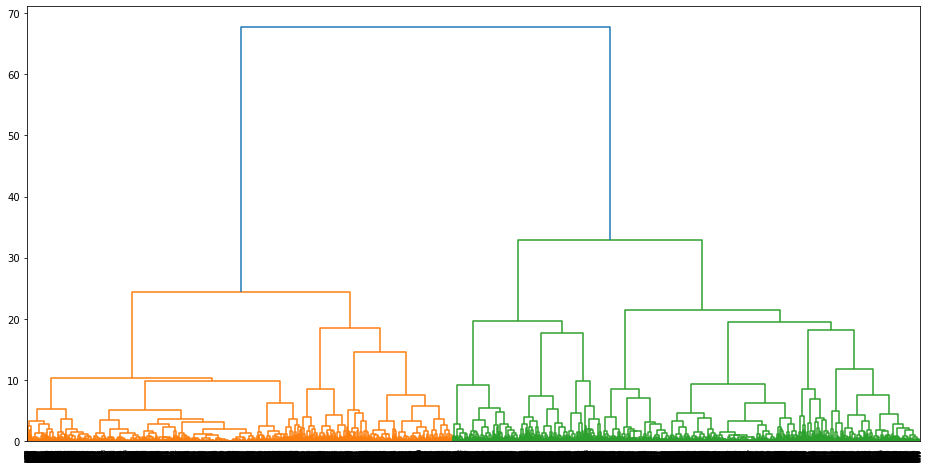

In [6]:
# Ward (Euclidean)
plt.figure(figsize=(16,8))
d1 = dendrogram((l1))

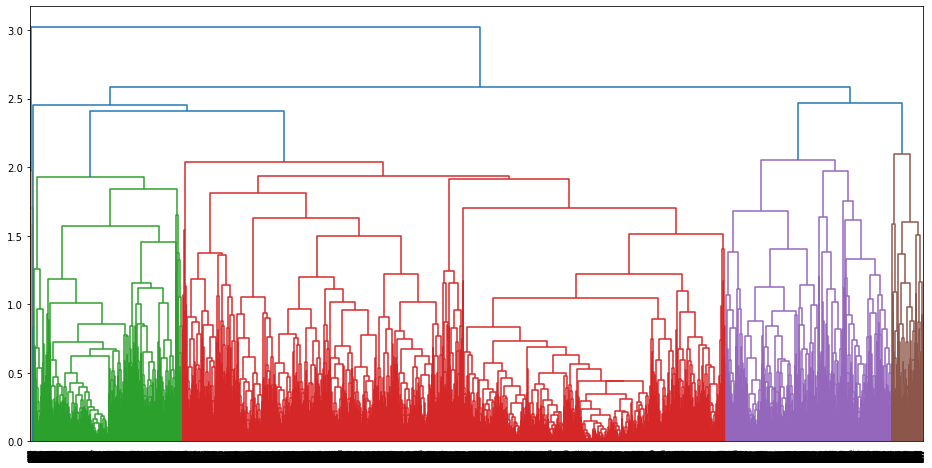

In [7]:
# Complete (Euclidean)
plt.figure(figsize=(16,8))
d2 = dendrogram((l2))

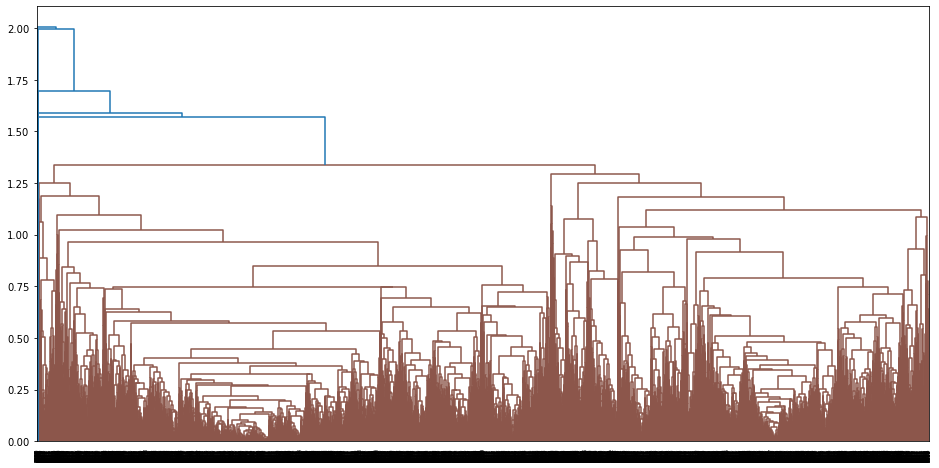

In [8]:
# Average (Euclidean)
plt.figure(figsize=(16,8))
d3 = dendrogram((l3))

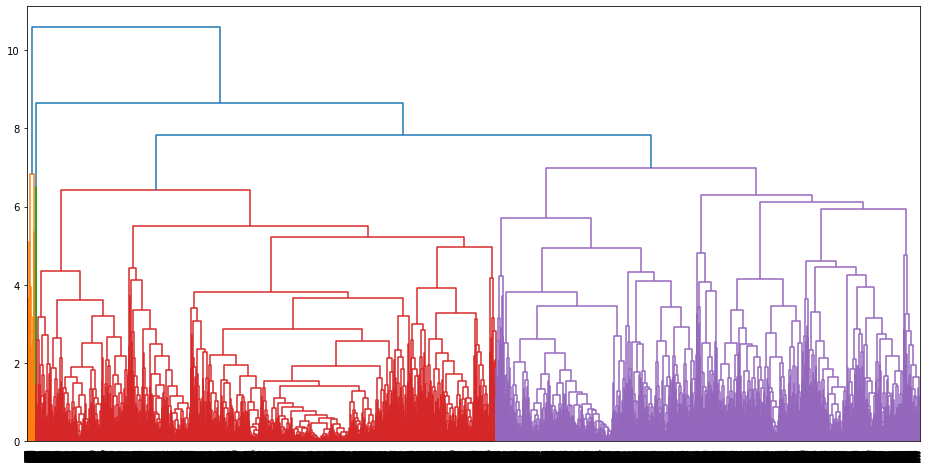

In [9]:
# Complete (Manhattan)
plt.figure(figsize=(16,8))
d4 = dendrogram((l4))

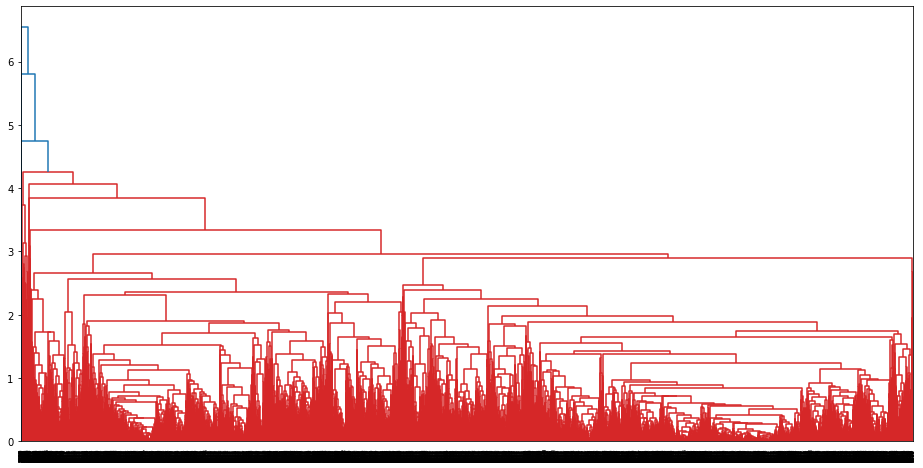

In [10]:
# Average (Manhattan)
plt.figure(figsize=(16,8))
d5 = dendrogram((l5))

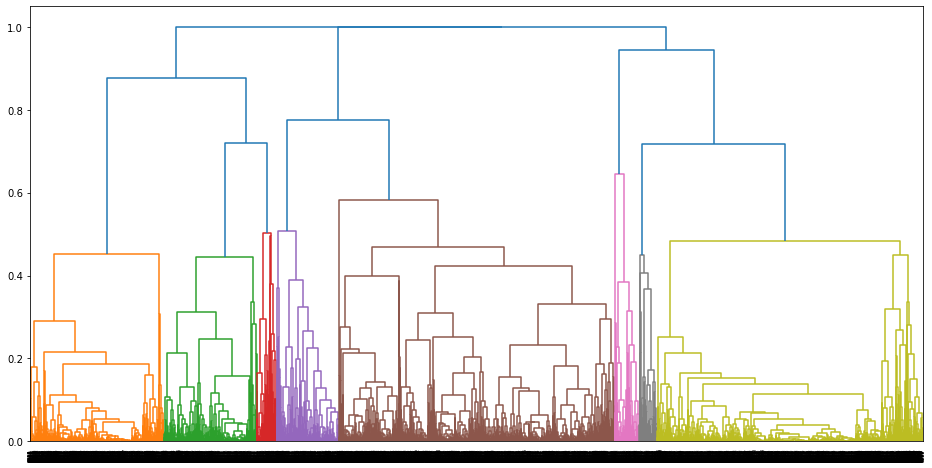

In [11]:
# Complete (Cosine)
plt.figure(figsize=(16,8))
d6 = dendrogram((l6))

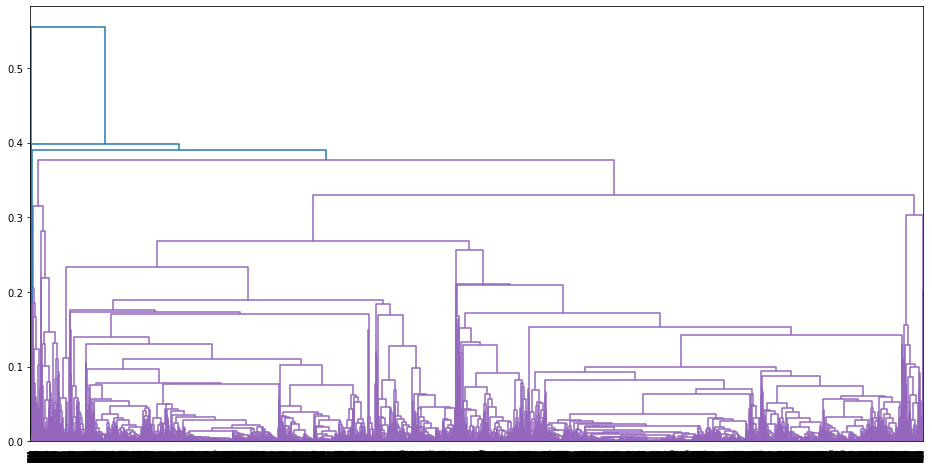

In [12]:
# Average (Cosine)
plt.figure(figsize=(16,8))
d7 = dendrogram((l7))

With the help of dendrograms obtained above, choose a suitable **k** for each linkage type. Experiment with different distance measures as mentioned below: <br>
1. Euclidean 
2. Manhattan 
3. Cosine <br> 
Calculate the cluster quality for each case and report your results in an organized, tabular format. The table should have the parameters used, cluster means and cluster quality.  

Dendogram Summary - Ward method allots the weightage to points equally/symmetrically at all levels as seen by the areas in Orange and Green because tree growth is "summative". Complete linkage allots more weightage to the center points and Average linkage is even more cluttered and is hard to interpret.

Having said that, it is not standard or practice to decide number of clusters based on dendograms visually. It won't tell which method is "better" and each method has its own "prototypical" tree look: the trees will differ consistently even when the data has no/random cluster structure. Also, the clustering algorithms will work even on the most unsuitable data and hence dendrograms should usually just be treated as a summary of the distance matrix.

In [13]:
# clustering (hint: Use AgglomerativeClustering imported above)
from sklearn.metrics import silhouette_score
k = [i for i in range(9) if i>1]
scores_1 = []
scores_2 = []
scores_3 = []
scores_4 = []
scores_5 = []
scores_6 = []
scores_7 = []
for i in range(len(k)):
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='euclidean', linkage='ward').fit_predict(data)
    scores_1.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='euclidean', linkage='complete').fit_predict(data)
    scores_2.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='euclidean', linkage='average').fit_predict(data)
    scores_3.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='manhattan', linkage='complete').fit_predict(data)
    scores_4.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='manhattan', linkage='average').fit_predict(data)
    scores_5.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='cosine', linkage='complete').fit_predict(data)
    scores_6.append(silhouette_score(data, cluster))
    cluster = AgglomerativeClustering(n_clusters=k[i], affinity='cosine', linkage='average').fit_predict(data)
    scores_7.append(silhouette_score(data, cluster))

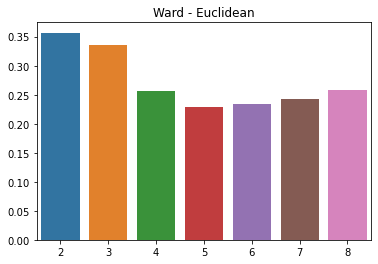

In [14]:
sns.barplot(k,scores_1)
plt.title('Ward - Euclidean')
plt.show()

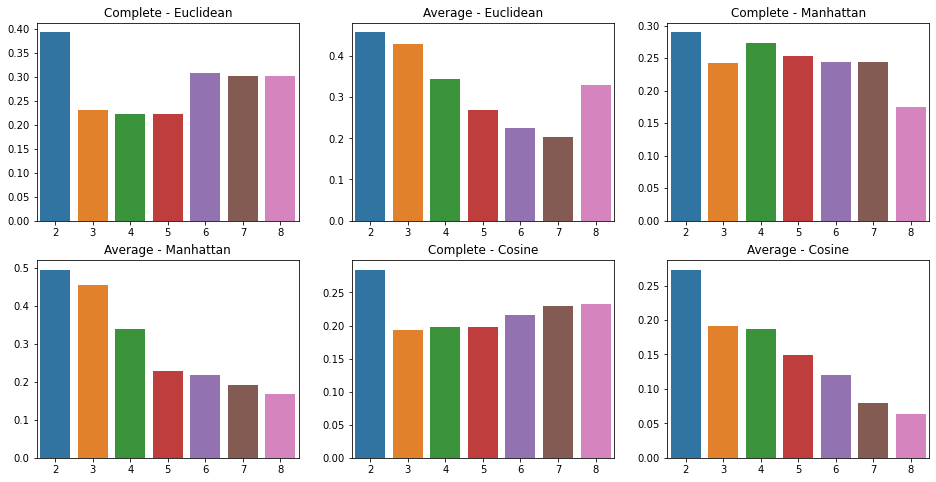

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(231)
plt.title('Complete - Euclidean')
sns.barplot(k,scores_2)
plt.subplot(232)
plt.title('Average - Euclidean')
sns.barplot(k,scores_3)
plt.subplot(233)
plt.title('Complete - Manhattan')
sns.barplot(k,scores_4)
plt.subplot(234)
plt.title('Average - Manhattan')
sns.barplot(k,scores_5)
plt.subplot(235)
plt.title('Complete - Cosine')
sns.barplot(k,scores_6)
plt.subplot(236)
plt.title('Average - Cosine')
sns.barplot(k,scores_7)
plt.show()

Suitable k is 2 in all cases as seen in the graphs as they have the highest Silhouette Coefficient clearly

In [16]:
# Function for finding the 17-dimensional cluster centers for different k
def calcClusterMeans(data, membership, clusters):
    centroids = np.zeros((clusters * data.shape[1])).reshape(clusters, data.shape[1])
    membership_index = {new_lists:[] for new_lists in range(clusters)}
    for j in range(data.shape[0]):
        membership_index[membership[j] - 1].append(j)
    for k,v in membership_index.items():
        centroids[k] = np.mean(data[v], axis=0)
    return centroids

In [17]:
from scipy.cluster.hierarchy import fcluster
df=pd.DataFrame({'K':[i for i in range(9) if i>1], 'Means':['' for i in range(7)],
              'Ward (Euclidean)':scores_1, 'Complete (Euclidean)':scores_2,
              'Average (Euclidean)':scores_3, 'Complete (Manhattan)':scores_4, 'Average (Manhattan)':scores_5,
              'Complete (Cosine)':scores_6, 'Average (Cosine)':scores_7})

df.loc[0, 'Means'] = str(calcClusterMeans(data, fcluster(l1, df.K[0], criterion='maxclust'), clusters=df.K[0]))
df.loc[1, 'Means'] = str(calcClusterMeans(data, fcluster(l2, df.K[1], criterion='maxclust'), clusters=df.K[1]))
df.loc[2, 'Means'] = str(calcClusterMeans(data, fcluster(l3, df.K[2], criterion='maxclust'), clusters=df.K[2]))
df.loc[3, 'Means'] = str(calcClusterMeans(data, fcluster(l4, df.K[3], criterion='maxclust'), clusters=df.K[3]))
df.loc[4, 'Means'] = str(calcClusterMeans(data, fcluster(l5, df.K[4], criterion='maxclust'), clusters=df.K[4]))
df.loc[5, 'Means'] = str(calcClusterMeans(data, fcluster(l6, df.K[5], criterion='maxclust'), clusters=df.K[5]))
df.loc[6, 'Means'] = str(calcClusterMeans(data, fcluster(l7, df.K[6], criterion='maxclust'), clusters=df.K[6]))

df.style.format({}).hide_index()
# Each row shows the cluster quality and centers for different k and different measures

K,Means,Ward (Euclidean),Complete (Euclidean),Average (Euclidean),Complete (Manhattan),Average (Manhattan),Complete (Cosine),Average (Cosine)
2,[[0.09443296 0.82270975 0.00539743 0.00527681 0.00220784 0.03052151 0.11136532 0.07060051 0.03948062 0.13108818 0.0379264 0.00581451 0.13898356 0.03002456 0.01157924 0.06778041 0.90867526] [0.0709763 0.92694043 0.03416661 0.02296193 0.0328916 0.01188585 0.83536058 0.32249415 0.66026241 0.05277893 0.01593218 0.07320105 0.15696043 0.03794346 0.01109122 0.23194507 0.92945571]],0.356759,0.392553,0.457327,0.289850,0.495558,0.284704,0.273264
3,[[0.39298753 0.9895623 0.49176819 0.45673272 0.24440461 0.01981842 0.97469133 0.88765433 0.82592589 0.05761314 0.02589581 0.39302711 0.55976009 0.45617941 0.04535557 0.43897304 0.98765432] [0.09302158 0.86009863 0.01450267 0.00961713 0.01419917 0.02434933 0.37848376 0.13608463 0.29793496 0.10442106 0.03096845 0.03167771 0.14317974 0.03190236 0.01296536 0.05667777 0.93721231] [0.03956562 0.93630091 0.03500269 0.02582048 0.02952917 0.00814197 0.87828596 0.42717871 0.59267902 0.04001505 0.01035338 0.06946251 0.16114938 0.0363865 0.00506749 0.49207 0.8563335 ]],0.336342,0.231260,0.430040,0.242713,0.454188,0.192860,0.190959
4,[[0.27384113 0.96868689 0.69272064 0.70751731 0.22806365 0.00549222 0.924074 0.88518522 0.59814811 0.01234563 0.00451671 0.44351335 0.64756075 0.62475839 0.05033285 0.73611111 0.96296296] [0.59243274 1. 0.25512764 0.01938115 0.52094889 0.02420398 1. 0.16666667 1. 0.01851844 0.00542005 0.641527 0.37228715 0.19777616 0.42903963 0. 1. ] [0.08173504 0.87712373 0.01970257 0.01383609 0.01789022 0.02067108 0.48973228 0.20177684 0.36397347 0.09013394 0.02633339 0.04048013 0.14775952 0.03343783 0.01113764 0.15319695 0.91947335] [0.57265003 1. 0.00880779 0.00327517 0.01326356 1. 0.583333 0.25 0.5 0.66666667 1. 0.05865922 0.65275459 0.76986308 0.0705984 0. 1. ]],0.256497,0.221762,0.343045,0.273314,0.340229,0.198390,0.187547
5,[[0.38561285 0.99785496 0.23999002 0.19927628 0.16205588 0.06313004 0.98849166 0.82529794 0.9111849 0.16394277 0.07335343 0.3108405 0.45375251 0.25948444 0.04406945 0.21650491 0.99250936] [0.23797009 0.7090908 0.28348385 0.33826686 0.00505538 0.34239937 0.3999998 0.3166666 0.1166666 0.27777787 0.28943089 0.05865922 0.53989983 0.75435362 0.06692983 0.36 1. ] [0.09344603 0.8302379 0.00557557 0.00444529 0.00410727 0.02997209 0.1592065 0.0609662 0.09814489 0.1307247 0.03807438 0.00817877 0.13800169 0.02947702 0.01201455 0.06134075 0.90855201] [0.02532725 0.86711812 0.01732236 0.0053598 0.02806373 0.00273856 0.85890687 0.09851369 0.78957972 0.01893876 0.00397182 0.04792884 0.1027975 0.01805058 0.00642864 0.26528001 0.87097042] [0.09740288 0.97880863 0.04459868 0.0354651 0.03297492 0.01555785 0.82250706 0.5619597 0.51076034 0.06682351 0.02005105 0.09197417 0.1976344 0.04771147 0.01286111 0.24103764 0.98265595]],0.229441,0.221464,0.268272,0.253667,0.228106,0.198418,0.148577
6,[[0.65710828 1. 0.91854364 0.99831715 0.19343689 0.00592066 0.9166665 0.8333335 0.666667 0.02777767 0.00406504 0.3603352 0.65776294 0.8181676 0.12360593 0.1666665 1. ] [0.18591205 0.69696967 0.45426853 0.5443168 0.00400444 0.13799059 0.361111 0.33333333 0.02777767 0.14814822 0.09485095 0.0707635 0.61602671 0.79001675 0.08624231 0.33333333 1. ] [0.30108709 0.9844156 0.24390041 0.19786619 0.17313325 0.09468718 0.93518299 0.76375442 0.73964973 0.18646202 0.08320135 0.31361097 0.42792099 0.30613538 0.03647192 0.2645054 0.98917749] [0.07997937 0.87634582 0.01815291 0.01254384 0.01685384 0.01998001 0.48636683 0.19741377 0.36113744 0.08919875 0.02579508 0.03862883 0.14562291 0.03129012 0.01093649 0.15272342 0.91888488] [0.55512966 1. 0.15782112 0. 0.34397689 0. 1. 0. 1. 0. 0. 0.12290503 0.2654424 0.05300411 1. 0. 1. ] [0.57265003 1. 0.00880779 0.00327517 0.01326356 1. 0.583333 0.25 0.5 0.66666667 1. 0.05865922 0.65275459 0.76986308 0.0705984 0. 1. ]],0.233948,0.307609,0.224239,0.244753,0.218882,0.215399,0.120123
7,[[7.18462038e-02 9.08590543e-01 2.21484443e-02 5.4625

### Approach 2 [ 3 marks] 
Solve the same problem using a density based approach. Experiment with the following values of eps and minpts:<br> 
1. eps = 0.1, min_pts = 5
2. eps = 0.5, min_pts = 3
3. eps = 0.8, min_pts = 5 <br>
Analyze the results and comment on how the clustering changes as the above parameters are varied. Report the cluster quality for all the cases using the same measure as used for approach 1. Report results in a tabular format with parameters used, number of noise and core points and cluster quality. 

In [18]:
# clustering
dbscan_1 = DBSCAN(eps = 0.1, min_samples = 5).fit(data)
dbscan_2 = DBSCAN(eps = 0.5, min_samples = 3).fit(data)
dbscan_3 = DBSCAN(eps = 0.8, min_samples = 5).fit(data)

In [19]:
df1 = pd.DataFrame(dbscan_1.labels_, columns=['Lables'])
df2 = pd.DataFrame(dbscan_2.labels_, columns=['Lables'])
df3 = pd.DataFrame(dbscan_3.labels_, columns=['Lables'])

In [20]:
pd.DataFrame({"Epsilon":[0.1, 0.5, 0.8], "Samples":[5, 3, 5],
              "Clusters":[df1.Lables.value_counts().size-1, df2.Lables.value_counts().size-1, df3.Lables.value_counts().size-1],
              "Core Points":[df1[df1.Lables!=-1].count().values[0], df2[df2.Lables!=-1].count().values[0],
                             df3[df3.Lables!=-1].count().values[0]],
              "Noise Points":[df1[df1.Lables==-1].count().values[0], df2[df2.Lables==-1].count().values[0],
                              df3[df3.Lables==-1].count().values[0]],
              "Silhouette Score":[silhouette_score(data, dbscan_1.labels_), silhouette_score(data, dbscan_2.labels_),
                                  silhouette_score(data, dbscan_3.labels_)]}).style.format({}).hide_index()

Epsilon,Samples,Clusters,Core Points,Noise Points,Silhouette Score
0.100000,5,62,3918,5032,-0.480132
0.500000,3,1,8905,45,0.348658
0.800000,5,1,8944,6,0.420973


Analysis - Very less epsilon distance causes varied clusters and noise points with majority of the points considered noise. This is because small spaces are considered sparse due to small epsilon. Quality is very bad as indicated by a negative Silhouette coefficient.

Increasing the epsilon neighbourhood results in better clustering with a few points considered as outliers/noise. Partly another reason being smaller number of samples as an indication of density.
Increasing eplison and density samples further gives the best clustering with very few noise points.

## 5. Visualization [ 2 marks ] 
To visualize the clusters, reduce the data to 2 dimensions using PCA. Make a scatterplot with different colours for each cluster obtained. Make one visualization each for approach 1 and 2 (the parameters which gave the best cluster quality for each). 

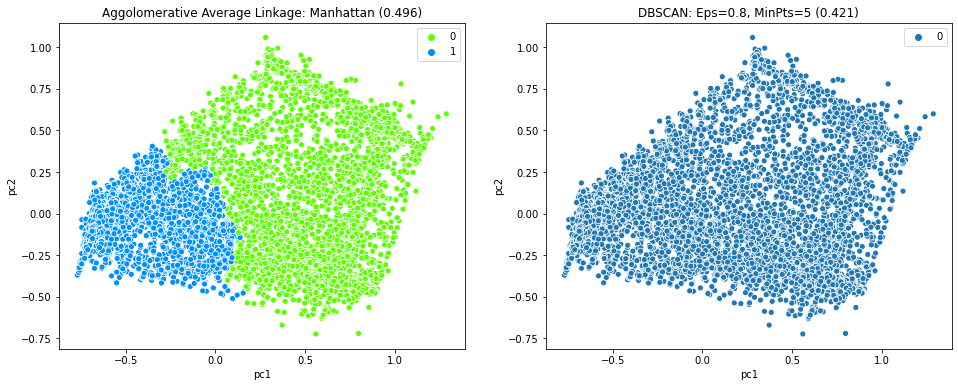

In [21]:
# visualization - reduce to two dimensions using PCA and make a scatterplot
data_pca = pd.DataFrame(PCA(n_components = 2).fit_transform(data), columns = ['pc1', 'pc2'])
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Aggolomerative Average Linkage: Manhattan (0.496)')
sns.scatterplot(data_pca.pc1, data_pca.pc2, palette = 'gist_rainbow',
                hue = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average').fit_predict(data_pca))
plt.subplot(122)
plt.title('DBSCAN: Eps=0.8, MinPts=5 (0.421)')
sns.scatterplot(data_pca.pc1, data_pca.pc2, hue = DBSCAN(eps = 0.8, min_samples = 5).fit(data_pca).labels_)
plt.show()